# Setup

In [1]:
%matplotlib inline

import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
import os

from dotenv import find_dotenv, load_dotenv

In [2]:
load_dotenv(find_dotenv())
repo_dir = os.environ['REPO_DIR']
test_image_dir = os.path.join(repo_dir, 'test_images')
output_images_dir = os.path.join(repo_dir, 'output_images')

In [3]:
img_path = os.path.join(repo_dir, 'output_images', 'test1.jpg')

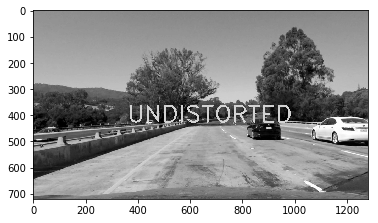

In [4]:
img = cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

# Sobel

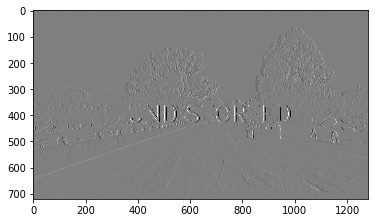

In [5]:
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
plt.imshow(sobelx, cmap='gray')

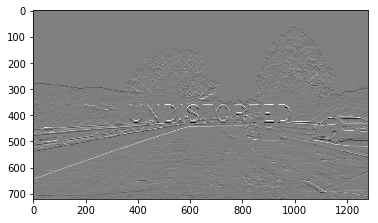

In [6]:
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
plt.imshow(sobely, cmap='gray')

# Absolute Sobel

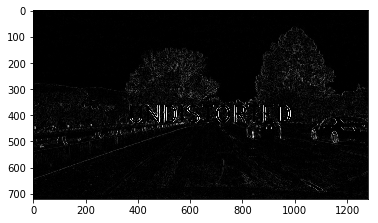

In [7]:
abs_sobelx = np.absolute(sobelx)
plt.imshow(abs_sobelx, cmap='gray')

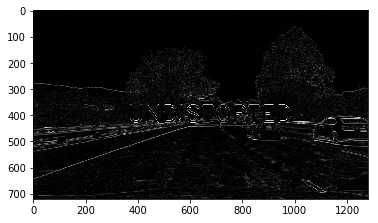

In [8]:
abs_sobely = np.absolute(sobely)
plt.imshow(abs_sobely, cmap='gray')

# Scaled Sobel

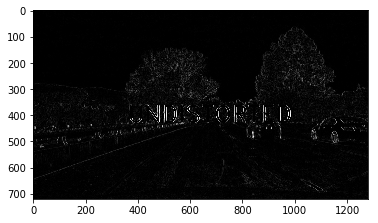

In [9]:
scaled_sobelx = np.uint8(255 * abs_sobelx / np.max(abs_sobelx))
plt.imshow(scaled_sobelx, cmap='gray')

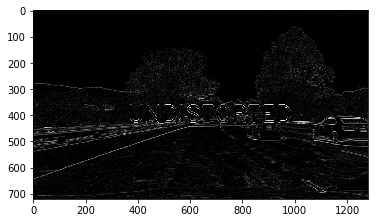

In [10]:
scaled_sobely = np.uint8(255 * abs_sobely / np.max(abs_sobely))
plt.imshow(scaled_sobely, cmap='gray')

# Binary Threshold

In [11]:
thresh_min = 20
thresh_max = 100

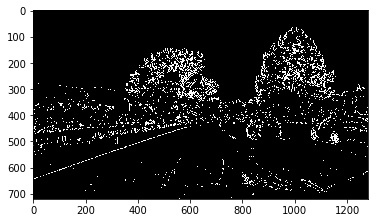

In [12]:
sxbinary = np.zeros_like(scaled_sobelx)
sxbinary[(scaled_sobelx >= thresh_min) & (scaled_sobelx <= thresh_max)] = 1
plt.imshow(sxbinary, cmap='gray')

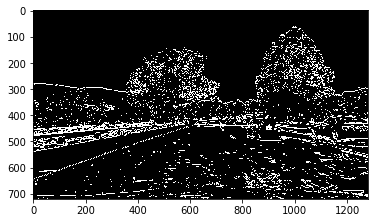

In [13]:
sybinary = np.zeros_like(scaled_sobely)
sybinary[(scaled_sobely >= thresh_min) & (scaled_sobely <= thresh_max)] = 1
plt.imshow(sybinary, cmap='gray')

# Colour spaces

In [14]:
def plot_channels(img, colour_spaces, channels_list, image_name):
    # build plot
    rows = len(colour_spaces)
    cols = len(channels_list[0]) + 1
    fig, axes = plt.subplots(rows, cols, figsize=(15, 8))
    
    for i, (colour_space, channels) in enumerate(zip(colour_spaces, channels_list)):
        # convert image
        img = cv2.cvtColor(img.copy(), colour_space)

        # plot original
        axes[i, 0].imshow(img)
        axes[i, 0].set_title(''.join(channels))
        
        # plot channels
        for j, channel in enumerate(channels):
            x = img[:, :, i]

            axes[i, j+1].imshow(x, cmap='gray')
            axes[i, j+1].set_title(channel)

    fig.suptitle('Colour channels for {}'.format(image_name), fontsize=10)
    plt.tight_layout()
    plt.savefig(os.path.join(output_images_dir, 'colour_channels_{}'.format(image_name)))
    plt.show()
    plt.close(fig)

In [15]:
def plot_colour_spaces(img, title):
    rgb = ['R', 'G', 'B']
    hls = ['H', 'L', 'S']
    hsv = ['H', 'S', 'V']
    
    channels_list = [rgb, hls, hsv]
    colour_spaces = [cv2.COLOR_BGR2RGB, cv2.COLOR_BGR2HLS, cv2.COLOR_BGR2HSV]

    plot_channels(img, colour_spaces, channels_list, title)

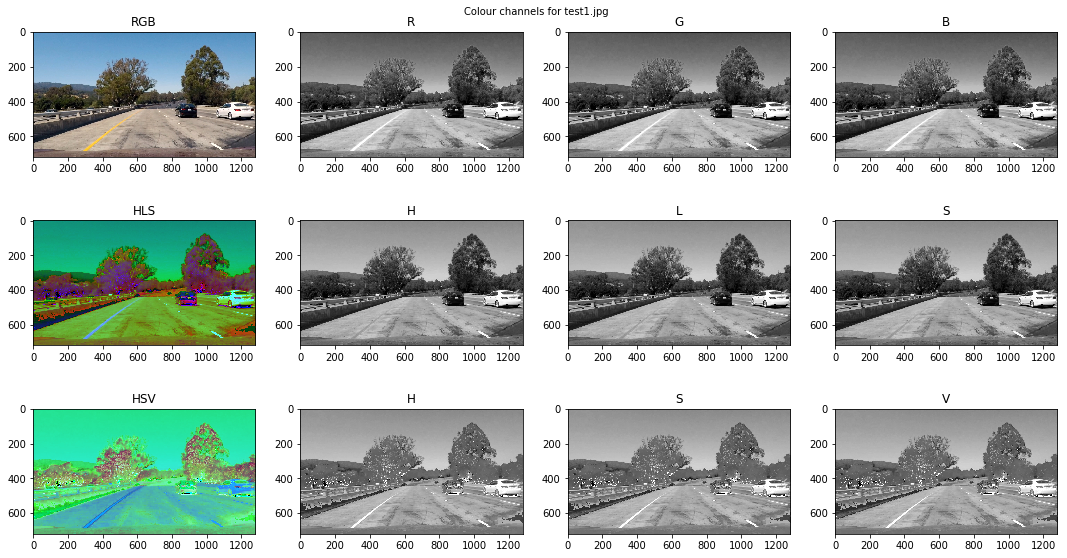

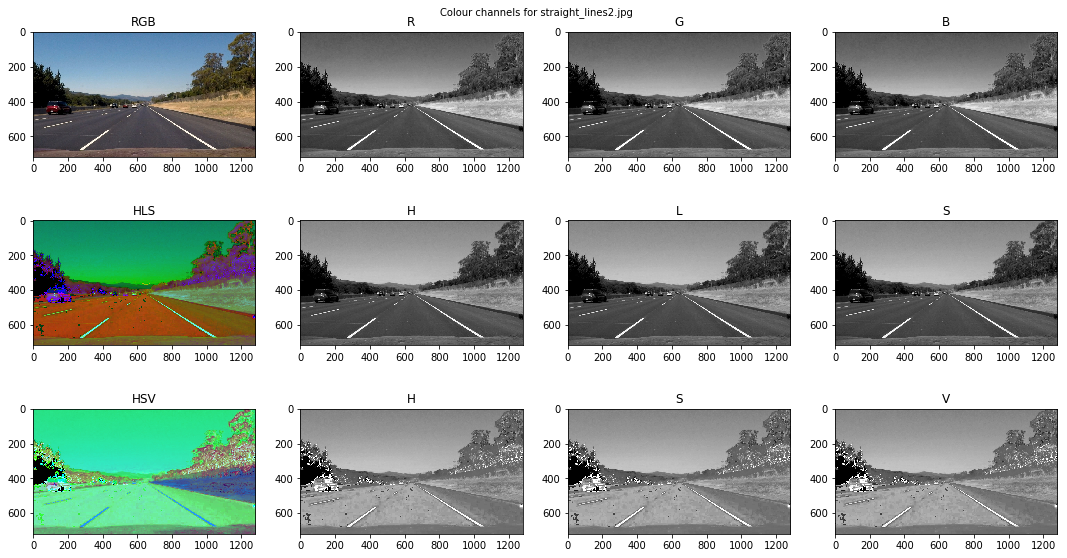

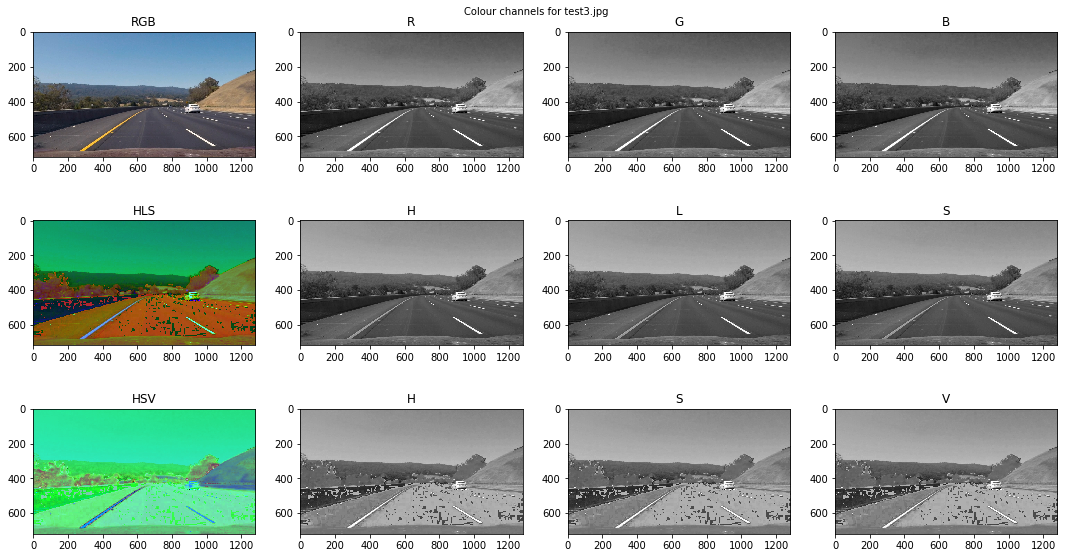

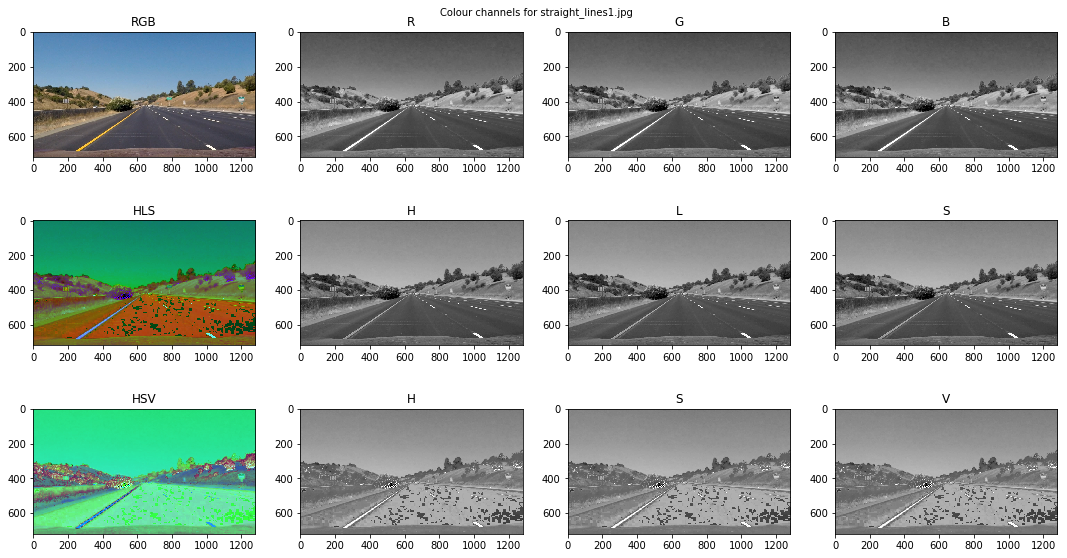

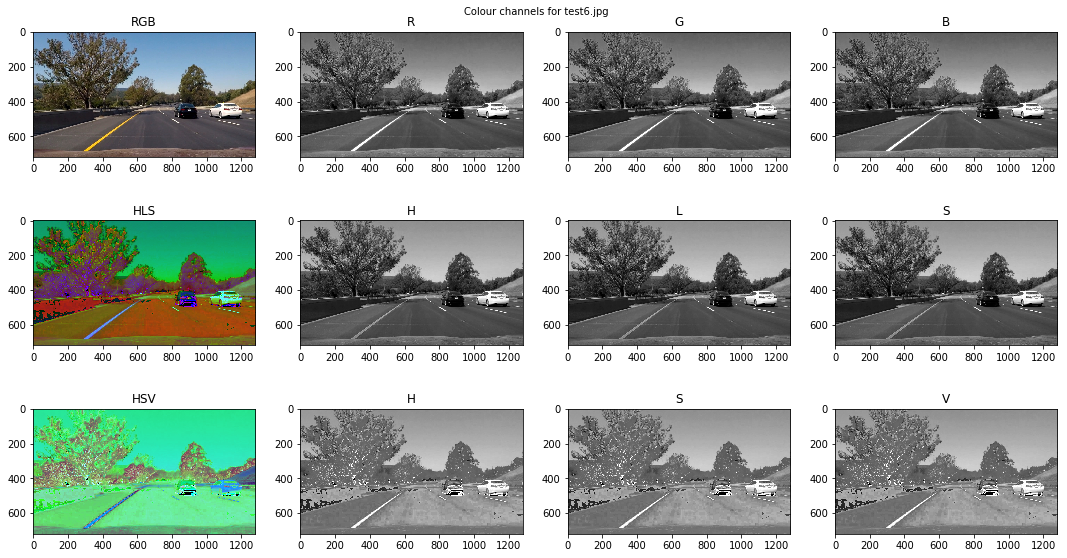

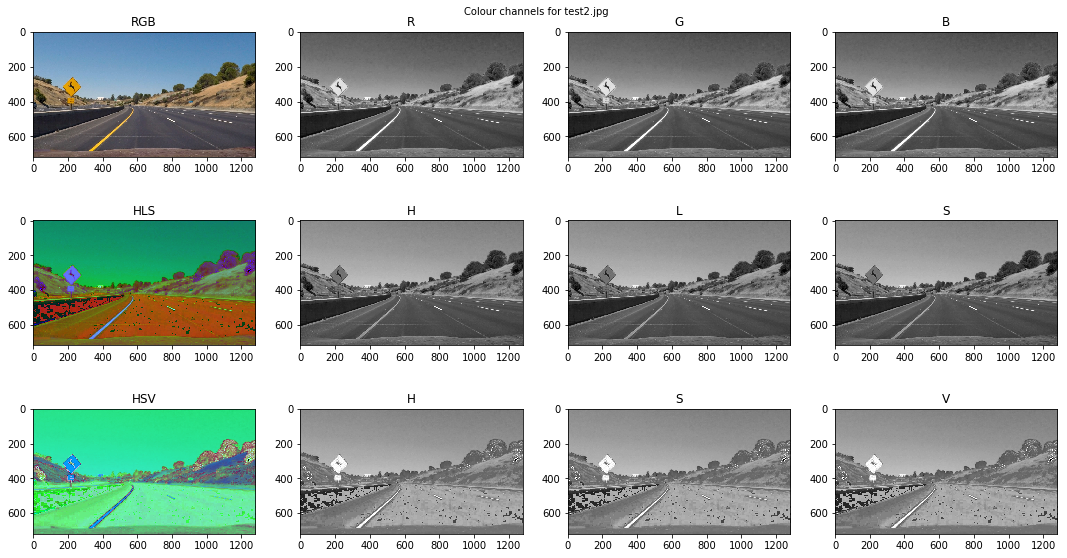

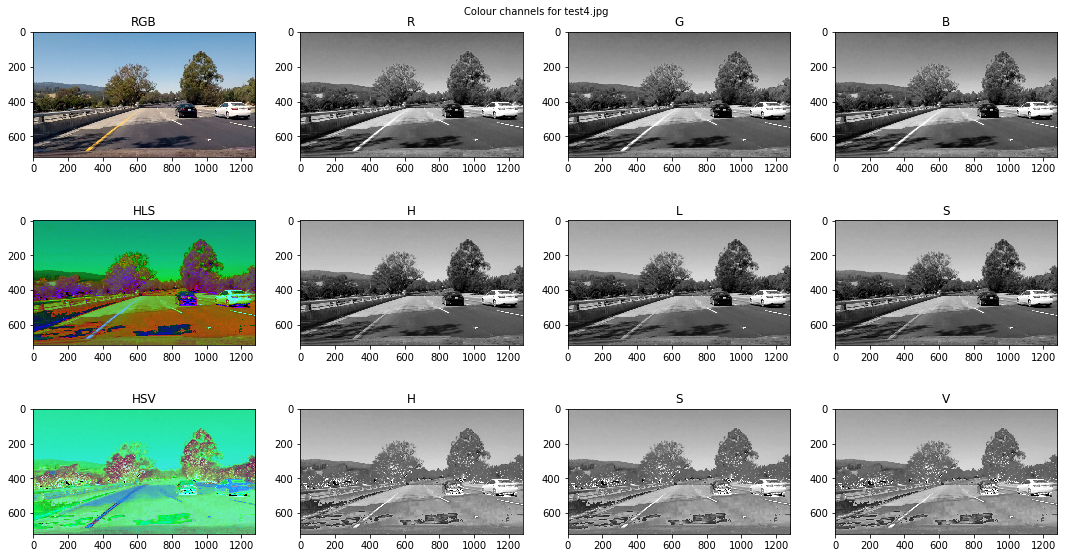

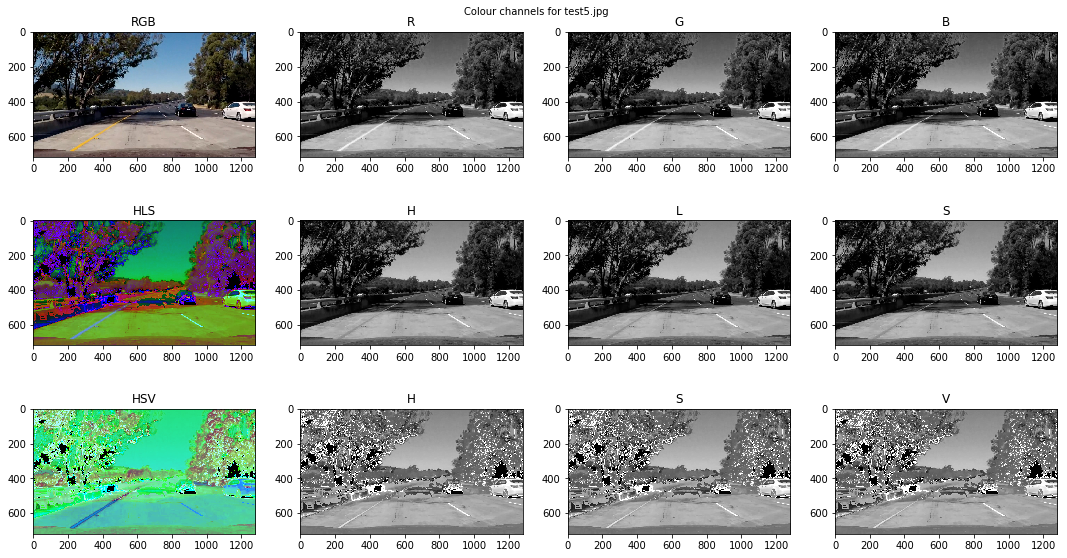

In [16]:
for path in glob.iglob(os.path.join(test_image_dir, '*.jpg')):
    img = cv2.imread(path)
    plot_colour_spaces(img, os.path.split(path)[-1])

# `abs_sobel_thresh()`

In [17]:
def abs_sobel_thresh(img, orient='x', thresh_min=50, thresh_max=100):
    """Return absolute sobel threshold image for further processing

    Steps taken
        1) Convert to grayscale
        2) Take the derivative in x or y given orient = 'x' or 'y'
        3) Take the absolute value of the derivative or gradient
        4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
        5) Create a mask of 1's where the scaled gradient magnitude
                is > thresh_min and < thresh_max

    Args:
        img (image): the image to apply the transform to

        orient (str): One of ['x', 'y'] axis to apply sobel operator to

        thresh_min (int): lower bound for determining binary output

        thresh_max (int`):: upper bound for determining binary output

    Returns:
        image: binary threshold image
    """

    # Define a function that takes an image, gradient orientation,
    # and threshold min / max values.

    # 1
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # 2 & 3
    if orient == 'x':
        abs_sobel = np.absolute(cv2.Sobel(img, cv2.CV_64F, 1, 0))
    if orient == 'y':
        abs_sobel = np.absolute(cv2.Sobel(img, cv2.CV_64F, 0, 1))

    # 4
    scaled_sobel = np.uint8(255 * abs_sobel / np.max(abs_sobel))

    # 5
    binary_output = np.zeros_like(scaled_sobel)
    binary_output[
        (scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1

    return binary_output

In [18]:
def show_plot(img, title):
    fig = plt.figure(figsize=(8, 3))
    plt.imshow(img, cmap='gray')
    fig.suptitle(title, fontsize=10)
    plt.tight_layout()
    plt.show()
    plt.close(fig)

def show_sobel_plots():
    images = []
    for path in glob.glob(os.path.join(test_image_dir, '*.jpg')):
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = abs_sobel_thresh(img, orient='x', thresh_min=20, thresh_max=100)
        show_plot(img, path)

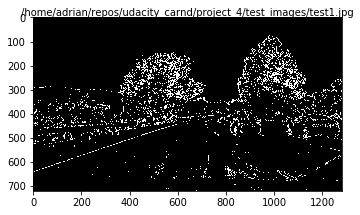

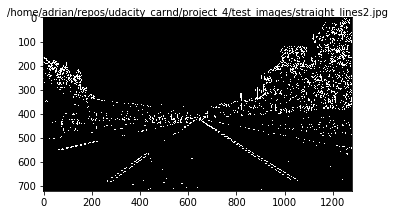

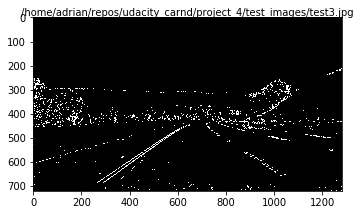

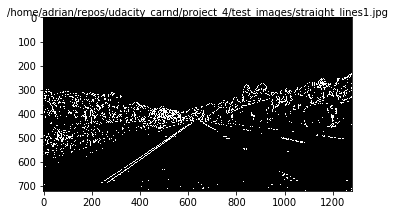

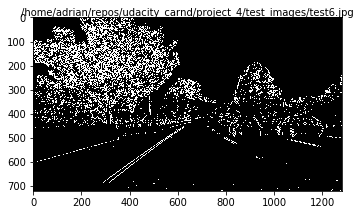

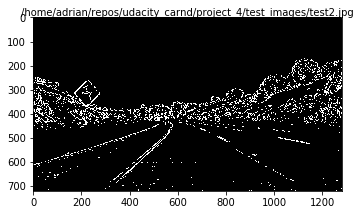

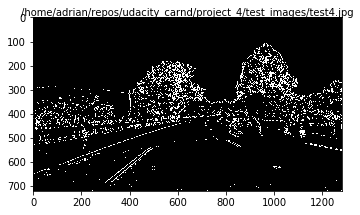

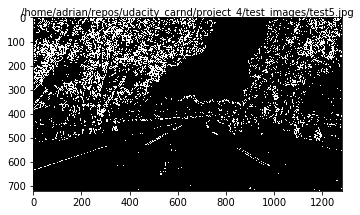

In [19]:
show_sobel_plots()

# Sobel operator on colour channels

In [20]:
def plot_channels_sobel(img, colour_spaces, channels_list, image_name, thresh_min, thresh_max):
    # build plot
    rows = len(colour_spaces)
    cols = len(channels_list[0]) + 1
    fig, axes = plt.subplots(rows, cols, figsize=(15, 8))
    
    for i, (colour_space, channels) in enumerate(zip(colour_spaces, channels_list)):
        # convert image
        orig = cv2.cvtColor(img.copy(), colour_space)
        
        # plot original
        axes[i, 0].imshow(orig, cmap='gray')
        axes[i, 0].set_title(''.join(channels))
        
        # plot channels
        for j, channel in enumerate(channels):
            x = orig[:, :, i]
            sobel_channel = abs_sobel_thresh(x, orient='x', thresh_min=thresh_min, thresh_max=thresh_max)

            axes[i, j+1].imshow(sobel_channel, cmap='gray')
            axes[i, j+1].set_title(channel)

    fig.suptitle('Colour channels for {} (thresh_min={}, thresh_max={})'.format(
        image_name, thresh_min, thresh_max), fontsize=10)
    plt.tight_layout()
    plt.savefig(os.path.join(output_images_dir, 'colour_channels_{}'.format(image_name)))
    plt.show()
    plt.close(fig)

In [21]:
def plot_colour_spaces_sobel(img, title, thresh_min, thresh_max):
    rgb = ['R', 'G', 'B']
    hls = ['H', 'L', 'S']
    hsv = ['H', 'S', 'V']
    
    channels_list = [rgb, hls, hsv]
    colour_spaces = [cv2.COLOR_BGR2RGB, cv2.COLOR_BGR2HLS, cv2.COLOR_BGR2HSV]

    plot_channels_sobel(img, colour_spaces, channels_list, title, thresh_min, thresh_max)

In [22]:
def show_colour_spaces_sobel(thresh_min, thresh_max):
    for path in glob.iglob(os.path.join(test_image_dir, '*.jpg')):
        img = cv2.imread(path)
        plot_colour_spaces_sobel(img, os.path.split(path)[-1], thresh_min, thresh_max)

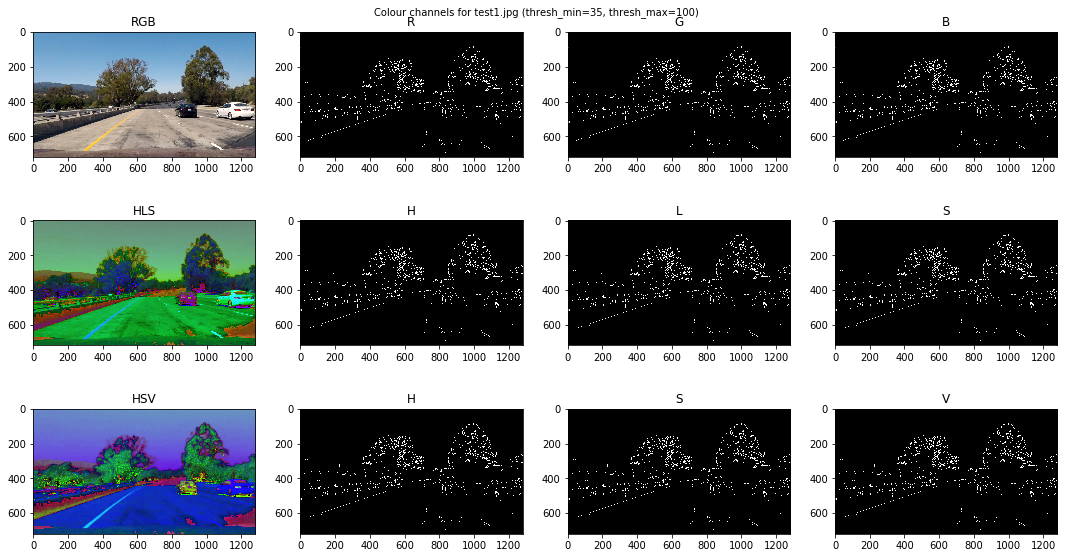

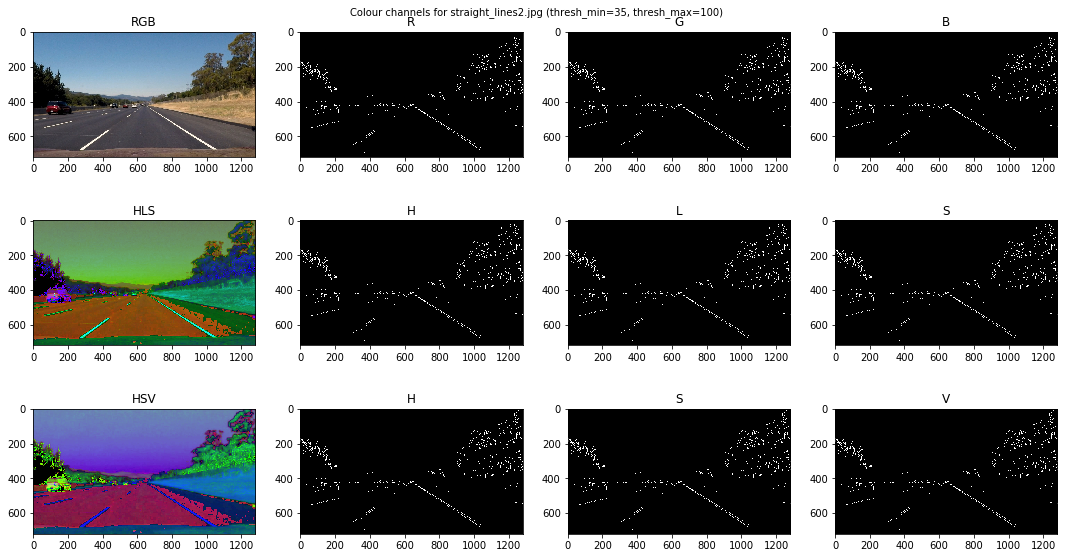

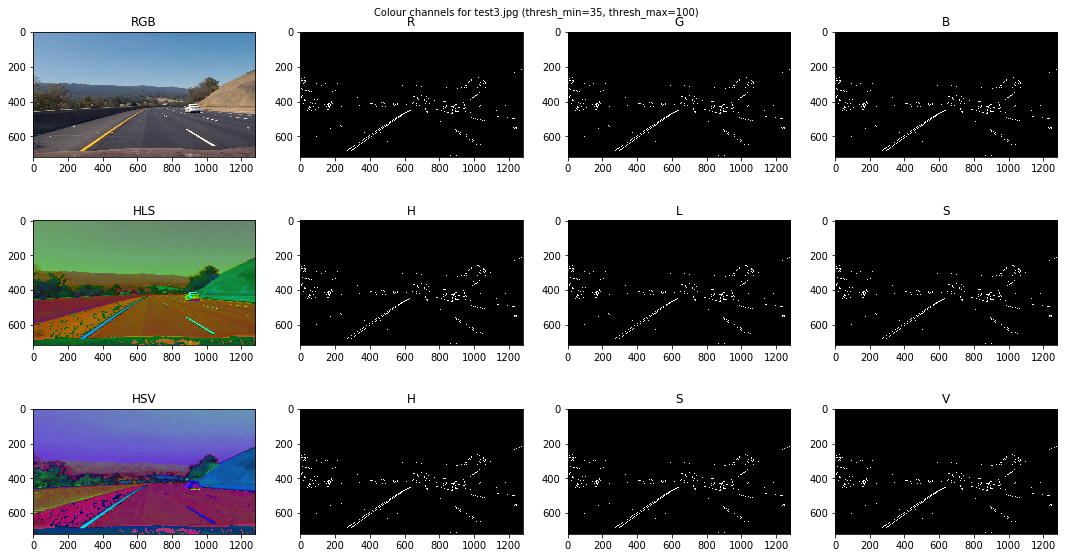

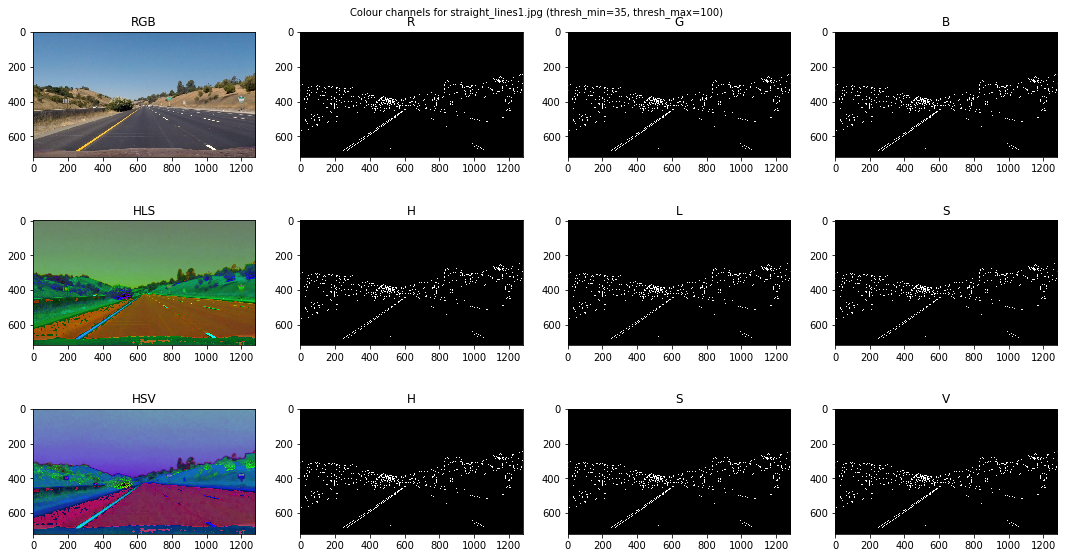

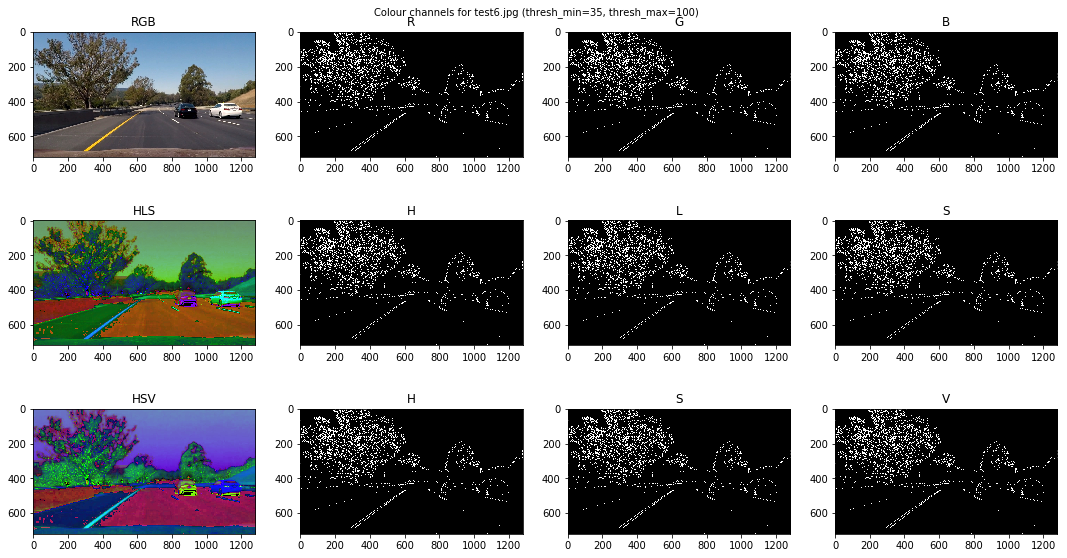

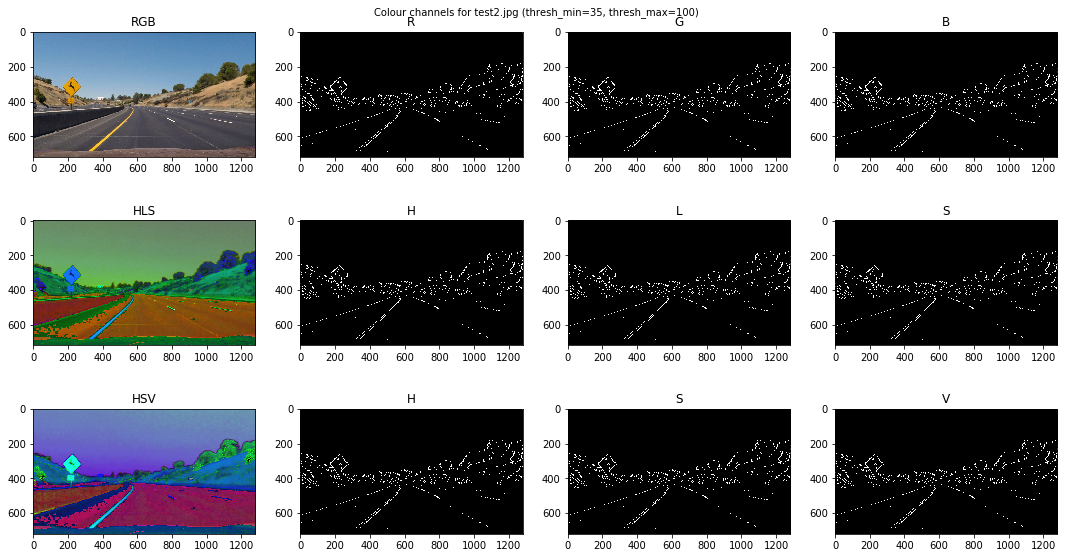

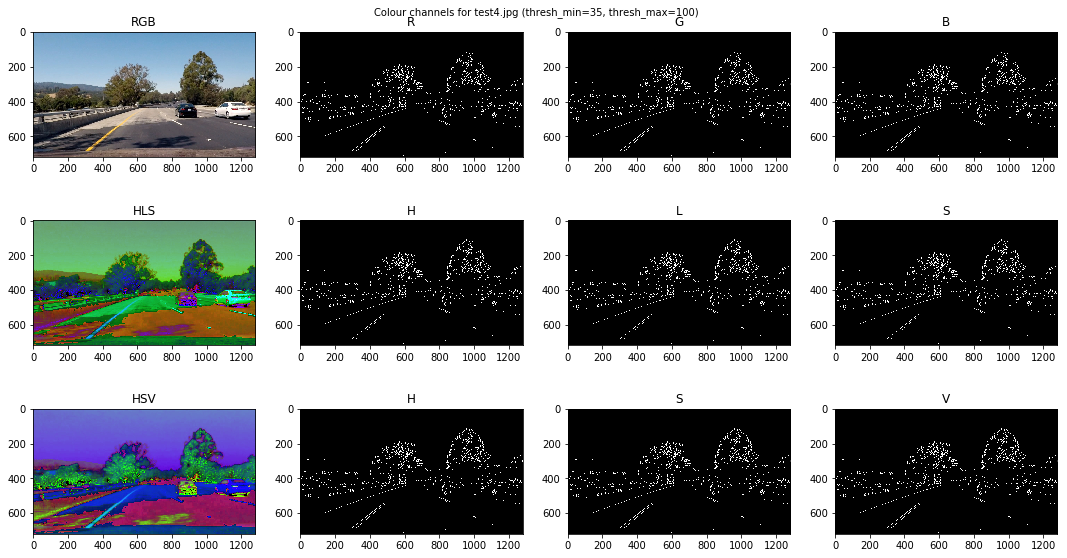

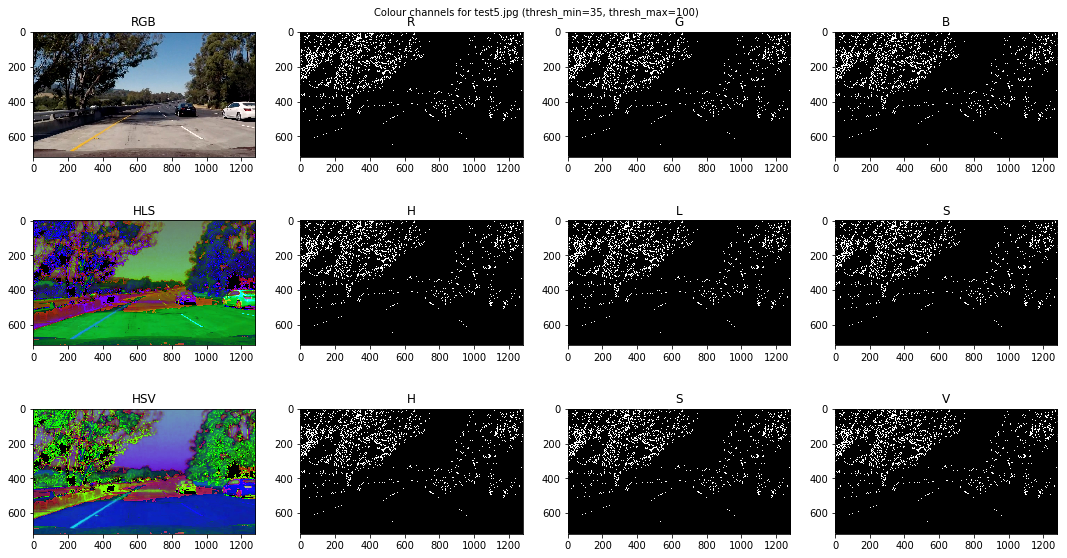

In [23]:
show_colour_spaces_sobel(thresh_min=35, thresh_max=100)